In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import os

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import plotly.express as px

# 날씨 데이터 불러오기

In [5]:
wh = pd.read_csv('wth_data_20211025.csv', index_col = 0)
wh.head()

,tm,avgTa,minTa,maxTa,sumRnDur,mi10MaxRn,hr1MaxRn,sumRn,maxInsWs,maxWs,...,avgLmac,avgTs,avgCm10Te,avgCm30Te,avgM05Te,avgM15Te,avgM30Te,sumLrgEv,sumSmlEv,sumFogDur
0,2000-01-01,5.5,1.8,9.9,NaN,NaN,NaN,NaN,7.4,4.0,...,2.1,3.2,0.1,1.3,3.5,10.0,14.6,NaN,0.9,NaN
1,2000-01-02,4.2,-0.9,6.9,6.83,NaN,NaN,6.0,11.8,7.6,...,3.9,4.3,0.3,1.4,3.6,9.7,14.5,NaN,0.8,NaN
2,2000-01-03,-2.2,-4.6,0.1,NaN,NaN,NaN,NaN,8.1,5.9,...,0.4,-1.9,0.2,1.3,3.3,9.5,14.5,NaN,0.8,NaN
3,2000-01-04,0.3,-4.3,4.3,NaN,NaN,NaN,NaN,4.5,3.0,...,3.8,-1.3,0.1,1.3,3.3,9.5,14.5,NaN,0.7,NaN
4,2000-01-05,2.8,0.1,4.6,13.90,NaN,NaN,18.4,9.1,5.2,...,6.5,0.6,0.1,1.3,3.3,9.5,14.5,NaN,1.7,NaN


In [6]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7969 entries, 0 to 7968
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tm           7969 non-null   object 
 1   avgTa        7969 non-null   float64
 2   minTa        7969 non-null   float64
 3   maxTa        7968 non-null   float64
 4   sumRnDur     3098 non-null   float64
 5   mi10MaxRn    1996 non-null   float64
 6   hr1MaxRn     1996 non-null   float64
 7   sumRn        3099 non-null   float64
 8   maxInsWs     7967 non-null   float64
 9   maxWs        7967 non-null   float64
 10  avgWs        7966 non-null   float64
 11  avgTd        7969 non-null   float64
 12  minRhm       7968 non-null   float64
 13  avgRhm       7969 non-null   float64
 14  avgPa        7968 non-null   float64
 15  maxPs        7968 non-null   float64
 16  minPs        7967 non-null   float64
 17  avgPs        7968 non-null   float64
 18  ssDur        7969 non-null   float64
 19  sumSsH

In [7]:
wh.columns

Index(['tm', 'avgTa', 'minTa', 'maxTa', 'sumRnDur', 'mi10MaxRn', 'hr1MaxRn',
       'sumRn', 'maxInsWs', 'maxWs', 'avgWs', 'avgTd', 'minRhm', 'avgRhm',
       'avgPa', 'maxPs', 'minPs', 'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsr',
       'sumGsr', 'ddMefs', 'ddMes', 'sumDpthFhsc', 'avgTca', 'avgLmac',
       'avgTs', 'avgCm10Te', 'avgCm30Te', 'avgM05Te', 'avgM15Te', 'avgM30Te',
       'sumLrgEv', 'sumSmlEv', 'sumFogDur'],
      dtype='object')

In [8]:
col = {'tm':'Date', 'avgTa':'평균기온', 'minTa':'최저기온', 'maxTa':'최고기온', 'sumRnDur':'강수계속시간', 'mi10MaxRn':'10분최다강수', 'hr1MaxRn':'1시간최다강수', 'sumRn':'일강수',
       'maxInsWs':'최대순간풍속', 'maxWs':'최대풍속', 'avgWs':'평균풍속', 'avgTd':'평균이슬점온도', 'minRhm':'최소상대습도', 'avgRhm':'평균상대습도', 'avgPa':'평균현지기압',
       'maxPs':'최고해면기압', 'minPs':'최저해면기압', 'avgPs':'평균해면기압', 'ssDur':'가조시간', 'sumSsHr':'합계일조시간', 'hr1MaxIcsr':'1시간최다일사량', 'sumGsr':'합계일사량',
       'ddMefs':'최심신적설', 'ddMes':'최심적설', 'sumDpthFhsc':'3시간신적설', 'avgTca':'평균전운량', 'avgLmac':'평균중하층운량', 'avgTs':'평균지면온도',
       'avgCm10Te':'평균10cm지중온도', 'avgCm30Te':'평균30cm지중온도', 'avgM05Te':'0.5m지중온도', 'avgM15Te':'1.5m지중온도', 'avgM30Te':'3m지중온도',
       'sumLrgEv':'대형증발량', 'sumSmlEv':'소형증발량', 'sumFogDur':'안개계속시간'}

In [9]:
wh = wh.rename(columns = col)

In [10]:
wh.head()

,Date,평균기온,최저기온,최고기온,강수계속시간,10분최다강수,1시간최다강수,일강수,최대순간풍속,최대풍속,...,평균중하층운량,평균지면온도,평균10cm지중온도,평균30cm지중온도,0.5m지중온도,1.5m지중온도,3m지중온도,대형증발량,소형증발량,안개계속시간
0,2000-01-01,5.5,1.8,9.9,NaN,NaN,NaN,NaN,7.4,4.0,...,2.1,3.2,0.1,1.3,3.5,10.0,14.6,NaN,0.9,NaN
1,2000-01-02,4.2,-0.9,6.9,6.83,NaN,NaN,6.0,11.8,7.6,...,3.9,4.3,0.3,1.4,3.6,9.7,14.5,NaN,0.8,NaN
2,2000-01-03,-2.2,-4.6,0.1,NaN,NaN,NaN,NaN,8.1,5.9,...,0.4,-1.9,0.2,1.3,3.3,9.5,14.5,NaN,0.8,NaN
3,2000-01-04,0.3,-4.3,4.3,NaN,NaN,NaN,NaN,4.5,3.0,...,3.8,-1.3,0.1,1.3,3.3,9.5,14.5,NaN,0.7,NaN
4,2000-01-05,2.8,0.1,4.6,13.90,NaN,NaN,18.4,9.1,5.2,...,6.5,0.6,0.1,1.3,3.3,9.5,14.5,NaN,1.7,NaN


In [11]:
wh.index = wh['Date'].astype('datetime64[ns]')

In [12]:
wh.drop('Date', inplace = True, axis = 1)

In [13]:
wh = wh.fillna(0)

In [14]:
# 결측치 확인
wh.isna().sum().sum()

0

# 코스피 데이터 불러오기

In [15]:
kos = fdr.DataReader('KS11', '2000')

In [16]:
d = {'Change' : 'kospi_change'}
kos = kos.rename(columns = d)
kos = kos[['kospi_change']]
kos.head()

,kospi_change
Date,
2000-01-04,0.0301
2000-01-05,-0.0687
2000-01-06,-0.0259
2000-01-07,-0.0126
2000-01-10,0.0407


In [17]:
os.listdir()

['.ipynb_checkpoints',
 '02.finance_theme_code_crawling.ipynb',
 'all_ver1_1.ipynb',
 'all_ver1_2.ipynb',
 'all_ver1_3-Copy4.ipynb',
 'all_ver1_3.ipynb',
 'cd_theme_data_20211021.csv',
 'cd_theme_data_20211027.csv',
 'wth_data_20211025.csv',
 '머신러닝_태양광에너지 관련주 테마.ipynb',
 '제비',
 '테마 전체의 변동률 예측 머신러닝.R1.ipynb',
 '테마 전체의 변동률 예측 머신러닝.R2 - 복사본.ipynb',
 '테마 전체의 변동률 예측 머신러닝.R2.ipynb',
 '테마별 주식데이터',
 '테마별 주식데이터.zip']

In [18]:
path = './테마별 주식데이터'

In [19]:
L = [path + '/'+ i for i in os.listdir(path)]

In [20]:
len(L)

7

In [21]:
Y = pd.DataFrame()

for i in L :
    print(i)
    v = pd.read_csv(i, index_col = 0)
    v = pd.DataFrame(v.groupby('Date')['Change'].mean())
    v.columns = [i.split('/')[2].split('_')[0] + '_change']
    v.index = v.index.astype('datetime64[ns]')
    Y = pd.concat([Y, v], axis=1)
# j += 1

Y.head()

./테마별 주식데이터/겨울_list_20211027.csv
./테마별 주식데이터/도시가스_list_20211027.csv
./테마별 주식데이터/여행_list_20211027.csv
./테마별 주식데이터/인터넷 대표주_list_20211027.csv
./테마별 주식데이터/제습기_list_20211027.csv
./테마별 주식데이터/태양광에너지_list_20211027.csv
./테마별 주식데이터/태풍 및 장마_list_20211027.csv


,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change
Date,,,,,,,
2000-01-04,0.030136,-0.020502,0.100968,-0.119001,0.054689,0.031705,-0.007652
2000-01-05,0.023748,-0.015360,-0.096321,-0.118948,0.018182,-0.025857,-0.020016
2000-01-06,-0.019810,-0.024013,-0.055905,-0.120027,0.037346,-0.026880,-0.045861
2000-01-07,0.010704,-0.030269,-0.119311,-0.119290,-0.005948,0.006642,0.017759
2000-01-10,0.003991,0.059410,-0.007423,0.010749,-0.031333,0.002046,0.006444


# 코스피와 테마별 주식 데이터 concat

In [22]:
Y = pd.concat([Y,kos], axis =1)
Y.head(2)

,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change,kospi_change
Date,,,,,,,,
2000-01-04,0.030136,-0.020502,0.100968,-0.119001,0.054689,0.031705,-0.007652,0.0301
2000-01-05,0.023748,-0.015360,-0.096321,-0.118948,0.018182,-0.025857,-0.020016,-0.0687


# 코스피 변동률과 테마별 변동률의 상관관계
- 코스피 변동률과 태양광 에너지의 변동률의 상관관계가 높은 것으로 나왔다.

<AxesSubplot:>

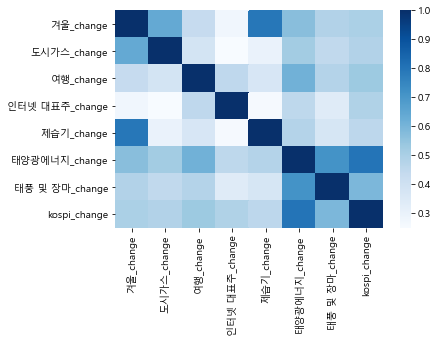

In [23]:
sns.heatmap(Y.corr(), cmap = 'Blues')

# 날씨데이터와 주가 데이터 concat

In [24]:
total_df = pd.concat([wh, Y], axis = 1)
total_df = total_df.dropna()
total_df.isnull().sum().sum()

0

In [25]:
total_df.head()

,평균기온,최저기온,최고기온,강수계속시간,10분최다강수,1시간최다강수,일강수,최대순간풍속,최대풍속,평균풍속,...,소형증발량,안개계속시간,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change,kospi_change
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,0.3,-4.3,4.3,0.00,0.0,0.0,0.0,4.5,3.0,1.7,...,0.7,0.0,0.030136,-0.020502,0.100968,-0.119001,0.054689,0.031705,-0.007652,0.0301
2000-01-05,2.8,0.1,4.6,13.90,0.0,0.0,18.4,9.1,5.2,3.2,...,1.7,0.0,0.023748,-0.015360,-0.096321,-0.118948,0.018182,-0.025857,-0.020016,-0.0687
2000-01-06,1.7,-4.2,5.7,6.08,0.0,0.0,9.8,11.1,6.9,3.5,...,1.0,0.0,-0.019810,-0.024013,-0.055905,-0.120027,0.037346,-0.026880,-0.045861,-0.0259
2000-01-07,-8.2,-12.1,-4.2,1.50,0.0,0.0,0.0,12.3,7.2,2.5,...,0.8,0.0,0.010704,-0.030269,-0.119311,-0.119290,-0.005948,0.006642,0.017759,-0.0126
2000-01-10,-0.8,-4.8,2.3,1.83,0.0,0.0,0.1,8.8,5.5,2.8,...,1.0,0.0,0.003991,0.059410,-0.007423,0.010749,-0.031333,0.002046,0.006444,0.0407


# 총 데이터의 기술통계량 확인

In [26]:
total_df.describe().T

,count,mean,std,min,25%,50%,75%,max
평균기온,5381.0,13.076417,10.501693,-15.500000,4.200000,14.400000,22.500000,33.700000
최저기온,5381.0,9.188887,10.606737,-18.600000,0.400000,9.800000,18.800000,30.300000
최고기온,5381.0,17.607582,10.702111,-12.400000,8.400000,19.400000,26.900000,39.600000
강수계속시간,5381.0,2.229913,4.402864,0.000000,0.000000,0.000000,2.250000,24.000000
10분최다강수,5381.0,0.561085,1.995413,0.000000,0.000000,0.000000,0.000000,26.600000
1시간최다강수,5381.0,1.342055,5.106588,0.000000,0.000000,0.000000,0.000000,68.000000
일강수,5381.0,3.758316,14.478471,0.000000,0.000000,0.000000,0.500000,301.500000
최대순간풍속,5381.0,8.539231,2.704584,0.000000,6.600000,8.000000,9.900000,24.000000
최대풍속,5381.0,4.995837,1.487491,0.000000,4.000000,4.800000,5.800000,14.000000
평균풍속,5381.0,2.359803,0.845299,0.000000,1.800000,2.200000,2.800000,7.500000


# 날씨 데이터와 주가의 상관관계 확인
- 눈에 띄게 상관관계가 높은 부분은 보이지 않음

<AxesSubplot:>

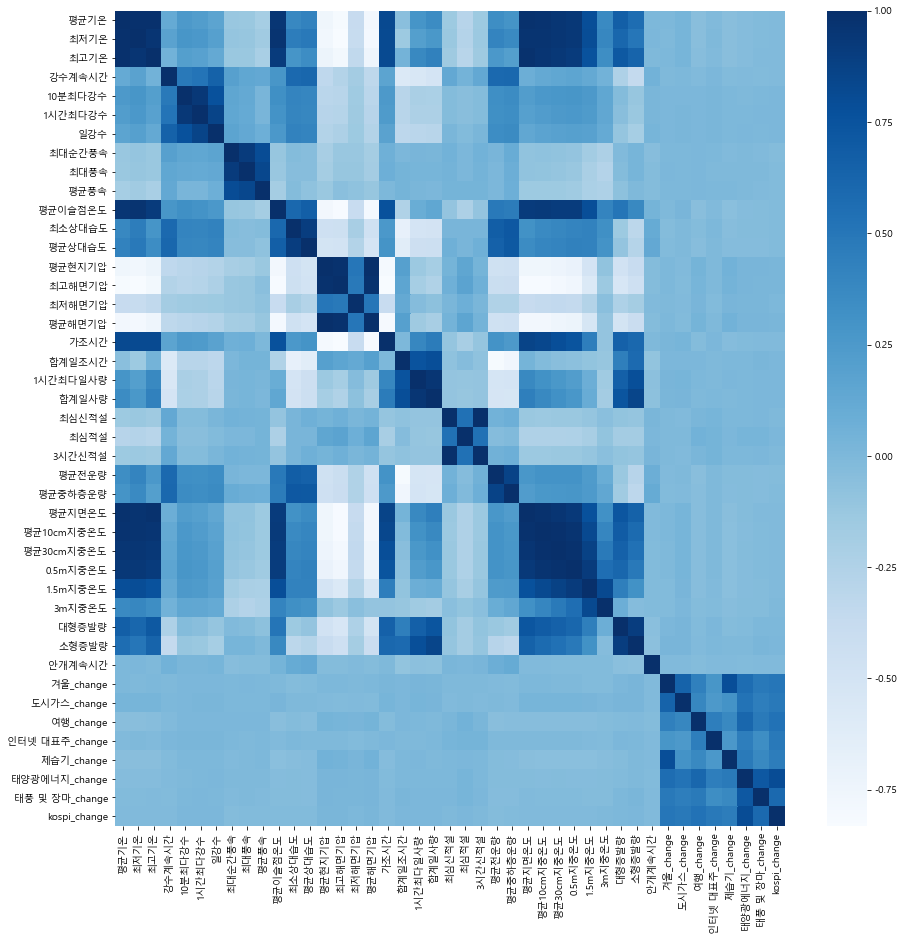

In [27]:
plt.figure(figsize = (15,15))
sns.heatmap(total_df.corr(), cmap = 'Blues')

# 코스피 보정값

### 코스피의 영향을 줄이기 위하여 각 테마에서 코스피change를 뺄때
### 코스피의 change가 0보다 크면 0.1 곱한 값을 빼주고
### 코스피의 change가 0보다 작으면 절대값에 0.1 곱한 값을 빼주기 위해 함수를 생성

In [28]:
def kospi_co(x) :  # x는 코스피 y는 변동값
    i=0
    L=[]

    while i < len(x):
        if x[i] > 0:
            t = x[i]*0.1
        else :
            t = abs(x[i])*0.1
        i +=1
        L.append(t)
    return L

# 테마별 변동률을 이진분류하는 함수 생성

### 이진분류모델로 만들기 위해 0보다 크면 1, 그 외에는 0으로 리턴하는 함수를 생성했다.

In [29]:
def plus_minus(x) :
    i=0
    L=[]

    while i < len(x):
        if x[i] > 0:
            t = 1
        else :
            t = 0
        i +=1
        L.append(t)
    return L

In [30]:
total_df.head(2)

,평균기온,최저기온,최고기온,강수계속시간,10분최다강수,1시간최다강수,일강수,최대순간풍속,최대풍속,평균풍속,...,소형증발량,안개계속시간,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change,kospi_change
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,0.3,-4.3,4.3,0.0,0.0,0.0,0.0,4.5,3.0,1.7,...,0.7,0.0,0.030136,-0.020502,0.100968,-0.119001,0.054689,0.031705,-0.007652,0.0301
2000-01-05,2.8,0.1,4.6,13.9,0.0,0.0,18.4,9.1,5.2,3.2,...,1.7,0.0,0.023748,-0.015360,-0.096321,-0.118948,0.018182,-0.025857,-0.020016,-0.0687


In [31]:
total_df.columns

Index(['평균기온', '최저기온', '최고기온', '강수계속시간', '10분최다강수', '1시간최다강수', '일강수', '최대순간풍속',
       '최대풍속', '평균풍속', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균현지기압', '최고해면기압',
       '최저해면기압', '평균해면기압', '가조시간', '합계일조시간', '1시간최다일사량', '합계일사량', '최심신적설',
       '최심적설', '3시간신적설', '평균전운량', '평균중하층운량', '평균지면온도', '평균10cm지중온도',
       '평균30cm지중온도', '0.5m지중온도', '1.5m지중온도', '3m지중온도', '대형증발량', '소형증발량',
       '안개계속시간', '겨울_change', '도시가스_change', '여행_change', '인터넷 대표주_change',
       '제습기_change', '태양광에너지_change', '태풍 및 장마_change', 'kospi_change'],
      dtype='object')

In [66]:
# 데이터 표준화 함수 생성
def standards(x):
    return (x - x.mean())/(x.std())

# 1. 테마별 지수 데이터와 날씨의 관계 분석
- 분석기간 : 2000-01 ~ 2021-10
- 테스트 데이터 : 2000-01 ~ 2019-12
- 실제 시험 데이터 : 2020-01 ~ 

In [38]:
y1 = total_df.loc[:,'겨울_change':'태풍 및 장마_change']
x1 = total_df.iloc[:, :-8]

# 데이터 이진변환

In [39]:
for i in range(len(y1.columns)):
    y1.iloc[:,i] = plus_minus(y1.iloc[:,i])

## Case 1 : X를 날씨, y를 각 테마별 변동률로 설정하여 모델을 학습.
## 변동률은 0보다 크면 1, 0보다 작으면 0으로 이진분류로 분류함.
## 사용모델 : 
### DecisionTreeClassifier
### LogisticRegression
### KNeighborsClassifier
### naive_bayes
### RandomForestClassifier
### VotingClassifier
   
## 2019-12-31 이전 데이터를 학습 및 평가용으로 그 이후 데이터를 
## 실제 데이터에 적용을 하기 위해 아래와 같이 나누었다.

## x1_tr y1_tr : 모델 학습 및 평가때 쓰이는 데이터, 2019-12-31 이전
## x1_te, y1_te : 학습된 모델을 실제 데이터에 투입하여 확인하는 데이터 2020-01-01 이후

## 테스트 결과는 ensemble 계열의 모델은 과적합, LogisticRegression은 점수가 낮게 나왔다.

## 모델의 설명력을 올리기 위해 Case2에서 코스피의 변동률을 각 테마에서 빼서 실행.

In [70]:
# 학습 및 모형 평가때 쓰이는 데이터
x1_tr = x1.loc[:'2020-01-01',:]
y1_tr = y1.loc[:'2020-01-01',:]

# 실제 평가를 하는 데이터
x1_te = x1.loc['2019-12-31':,:]
y1_te = y1.loc['2019-12-31':,:]

# case 1 머신러닝 시작
- 결정나무, 로지스틱 회귀모델, K_Neighbors, 앙상블(랜덤포레스트, 보팅), 나이브베이즈 사용
- X : 날씨 y : 각 테마별 변동률

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score

from sklearn.metrics import classification_report

for i in range(len(y1.columns)) : 

    # 훈련용 데이터(X_tr)을 train_test_split으로 나누기
    
#   from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x1_tr, y1_tr.iloc[:,i], test_size = 0.2, random_state = 1)

    # 데이터 표준화
#     from sklearn.preprocessing import StandardScaler
    stds = StandardScaler()
    stds.fit(X_train)
    X_train_std = stds.transform(X_train)
    X_test_std = stds.transform(X_test)
    X_ftest_std = stds.transform(x1_te)

    # 분석 시작
#     from sklearn.tree import DecisionTreeClassifier
#     from sklearn.linear_model import LogisticRegression
#     from sklearn.neighbors import KNeighborsClassifier
#     from sklearn.naive_bayes import GaussianNB
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.ensemble import VotingClassifier
#     from sklearn.metrics import precision_score
    
    # 모델 생성
    log = LogisticRegression()
    knn = KNeighborsClassifier()
    tree = DecisionTreeClassifier()
    gnb = GaussianNB()
    rfc = RandomForestClassifier()
         
    hvot = VotingClassifier(estimators = [('log', log), ('rfc', rfc), ('knn', knn), \
                        ('tree',tree),('gnb', gnb)], voting='hard')

    svot = VotingClassifier(estimators = [('log', log), ('rfc', rfc), ('knn', knn), \
                        ('tree',tree),('gnb', gnb)], voting='soft')
    
    models = [log, tree, knn, gnb, rfc, hvot, svot]
    
    print('==================================={}=============================={} page'.format(y1.columns[i], i+1))
    
    y_fin = y1_te.iloc[:,i] # 최종 모형 평가 변수
    
    for m in models :
        m.fit(X_train, y_train)
        
        # 데이터 예측
        preds = m.predict(X_test) 
        
        # 정확도 평가
        accuracy0 = m.score(X_train, y_train)
        accuracy1 = m.score(X_test, y_test)
        accuracy2 = m.score(x1_te, y_fin)
        
        print(m.__class__.__name__, '정확도(훈련셋) :' , accuracy0)
        print(m.__class__.__name__, '정확도(테스트셋) :' , accuracy1)
        print(m.__class__.__name__, '정확도(실제 테스트셋) :' , accuracy2)
        
        print('-'*80)

    # 분류 레포트

#     from sklearn.metrics import classification_report
    
    y_fin = y1_te.iloc[:,i]                
    
    for m in models :
        preds0 = m.predict(X_test) # 데이터 예측
        preds1 = m.predict(x1_te)
        class_report1 = classification_report(y_test, preds0)
        class_report2 = classification_report(y_fin, preds1)
        
        print(m.__class__.__name__ , '훈련 데이터 테스트셋 \n',class_report1)
        print('-'*80)
#         print(m.__class__.__name__ , '실제 데이터 테스트셋 \n',class_report2)
    
    print('=================================== {} page ===================================\n\n\n '.format(i+1))

===================================겨울_change==============================1 page
LogisticRegression 정확도(훈련셋) : 0.545339412360689
LogisticRegression 정확도(테스트셋) : 0.5617408906882592
LogisticRegression 정확도(실제 테스트셋) : 0.5483146067415731
--------------------------------------------------------------------------------
DecisionTreeClassifier 정확도(훈련셋) : 1.0
DecisionTreeClassifier 정확도(테스트셋) : 0.5050607287449392
DecisionTreeClassifier 정확도(실제 테스트셋) : 0.48089887640449436
--------------------------------------------------------------------------------
KNeighborsClassifier 정확도(훈련셋) : 0.6864235055724417
KNeighborsClassifier 정확도(테스트셋) : 0.4817813765182186
KNeighborsClassifier 정확도(실제 테스트셋) : 0.5168539325842697
--------------------------------------------------------------------------------
GaussianNB 정확도(훈련셋) : 0.4804964539007092
GaussianNB 정확도(테스트셋) : 0.4433198380566802
GaussianNB 정확도(실제 테스트셋) : 0.451685393258427
--------------------------------------------------------------------------------
RandomFor

VotingClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.46      0.51      0.48       453
           1       0.54      0.49      0.51       535

    accuracy                           0.50       988
   macro avg       0.50      0.50      0.50       988
weighted avg       0.50      0.50      0.50       988

--------------------------------------------------------------------------------
VotingClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.44      0.49      0.46       453
           1       0.52      0.47      0.49       535

    accuracy                           0.48       988
   macro avg       0.48      0.48      0.48       988
weighted avg       0.48      0.48      0.48       988

--------------------------------------------------------------------------------
=================================== 2 page ===================================


 
===================================여행_c

GaussianNB 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.52      0.94      0.67       504
           1       0.56      0.08      0.13       484

    accuracy                           0.52       988
   macro avg       0.54      0.51      0.40       988
weighted avg       0.54      0.52      0.41       988

--------------------------------------------------------------------------------
RandomForestClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.51      0.52      0.52       504
           1       0.49      0.48      0.49       484

    accuracy                           0.50       988
   macro avg       0.50      0.50      0.50       988
weighted avg       0.50      0.50      0.50       988

--------------------------------------------------------------------------------
VotingClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.50      0.64   

GaussianNB 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.44      0.88      0.58       420
           1       0.64      0.16      0.26       568

    accuracy                           0.47       988
   macro avg       0.54      0.52      0.42       988
weighted avg       0.55      0.47      0.40       988

--------------------------------------------------------------------------------
RandomForestClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.45      0.35      0.39       420
           1       0.59      0.69      0.63       568

    accuracy                           0.54       988
   macro avg       0.52      0.52      0.51       988
weighted avg       0.53      0.54      0.53       988

--------------------------------------------------------------------------------
VotingClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.45      0.40   

# 2. 코스피 지수 보정값을 적용한 테마별 지수 데이터와 날씨의 관계 분석
- 분석기간 : 2000-01 ~ 2021-10
- 테스트 데이터 : 2000-01 ~ 2019-12
- 실제 시험 데이터 : 2020-01 ~ 
- 코스피 지수가 실제로 영향을 주기 때문에 코스피지수에 0.1을 곱한 후 값을 적용한다.

In [43]:
def kospi_co(x) :  # x는 코스피 y는 변동값
    i=0
    L=[]

    while i < len(x):
        if x[i] > 0:
            t = x[i]*0.05
        else :
            t = abs(x[i])*0.05
        i +=1
        L.append(t)
    return L

# 데이터 이진변환

In [44]:
y2 = total_df.loc[:,'겨울_change':]
x2 = total_df.iloc[:, :-8]
y2.head()

,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change,kospi_change
Date,,,,,,,,
2000-01-04,0.030136,-0.020502,0.100968,-0.119001,0.054689,0.031705,-0.007652,0.0301
2000-01-05,0.023748,-0.015360,-0.096321,-0.118948,0.018182,-0.025857,-0.020016,-0.0687
2000-01-06,-0.019810,-0.024013,-0.055905,-0.120027,0.037346,-0.026880,-0.045861,-0.0259
2000-01-07,0.010704,-0.030269,-0.119311,-0.119290,-0.005948,0.006642,0.017759,-0.0126
2000-01-10,0.003991,0.059410,-0.007423,0.010749,-0.031333,0.002046,0.006444,0.0407


In [45]:
y2['kospi_change'] = kospi_co(y2['kospi_change'])
y2.head()

,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change,kospi_change
Date,,,,,,,,
2000-01-04,0.030136,-0.020502,0.100968,-0.119001,0.054689,0.031705,-0.007652,0.001505
2000-01-05,0.023748,-0.015360,-0.096321,-0.118948,0.018182,-0.025857,-0.020016,0.003435
2000-01-06,-0.019810,-0.024013,-0.055905,-0.120027,0.037346,-0.026880,-0.045861,0.001295
2000-01-07,0.010704,-0.030269,-0.119311,-0.119290,-0.005948,0.006642,0.017759,0.000630
2000-01-10,0.003991,0.059410,-0.007423,0.010749,-0.031333,0.002046,0.006444,0.002035


In [46]:
len(y2.columns)

8

In [47]:
# 각 테마별 변동률 - 보정된 코스피 변동률

i = 0
while i < 8:
    print(i, end = ' ')
    y2.iloc[:,i] = y2.iloc[:,i] - y2['kospi_change']
    i +=1

y2.head()

0 1 2 3 4 5 6 7 

,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change,kospi_change
Date,,,,,,,,
2000-01-04,0.028631,-0.022007,0.099463,-0.120506,0.053184,0.030200,-0.009157,0.0
2000-01-05,0.020313,-0.018795,-0.099756,-0.122383,0.014747,-0.029292,-0.023451,0.0
2000-01-06,-0.021105,-0.025308,-0.057200,-0.121322,0.036051,-0.028175,-0.047156,0.0
2000-01-07,0.010074,-0.030899,-0.119941,-0.119920,-0.006578,0.006012,0.017129,0.0
2000-01-10,0.001956,0.057375,-0.009458,0.008714,-0.033368,0.000011,0.004409,0.0


In [48]:
y2 = y2.iloc[:,0:7]
y2.head()

,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change
Date,,,,,,,
2000-01-04,0.028631,-0.022007,0.099463,-0.120506,0.053184,0.030200,-0.009157
2000-01-05,0.020313,-0.018795,-0.099756,-0.122383,0.014747,-0.029292,-0.023451
2000-01-06,-0.021105,-0.025308,-0.057200,-0.121322,0.036051,-0.028175,-0.047156
2000-01-07,0.010074,-0.030899,-0.119941,-0.119920,-0.006578,0.006012,0.017129
2000-01-10,0.001956,0.057375,-0.009458,0.008714,-0.033368,0.000011,0.004409


In [49]:
# 이진분류로 만듦
for i in range(len(y2.columns)):
    y2.iloc[:,i] = plus_minus(y2.iloc[:,i])
y2.head()

,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change
Date,,,,,,,
2000-01-04,1,0,1,0,1,1,0
2000-01-05,1,0,0,0,1,0,0
2000-01-06,0,0,0,0,1,0,0
2000-01-07,1,0,0,0,0,1,1
2000-01-10,1,1,0,1,0,1,1


In [50]:
# 학습 및 모형 평가때 쓰이는 데이터
x2_tr = x2.loc[:'2020-01-01',:]
y2_tr = y2.loc[:'2020-01-01',:]

# 실제 평가를 하는 데이터
x2_te = x2.loc['2019-12-31':,:]
y2_te = y2.loc['2019-12-31':,:]


In [51]:
y2_tr.head()

,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change
Date,,,,,,,
2000-01-04,1,0,1,0,1,1,0
2000-01-05,1,0,0,0,1,0,0
2000-01-06,0,0,0,0,1,0,0
2000-01-07,1,0,0,0,0,1,1
2000-01-10,1,1,0,1,0,1,1


In [52]:
total_df.columns


Index(['평균기온', '최저기온', '최고기온', '강수계속시간', '10분최다강수', '1시간최다강수', '일강수', '최대순간풍속',
       '최대풍속', '평균풍속', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균현지기압', '최고해면기압',
       '최저해면기압', '평균해면기압', '가조시간', '합계일조시간', '1시간최다일사량', '합계일사량', '최심신적설',
       '최심적설', '3시간신적설', '평균전운량', '평균중하층운량', '평균지면온도', '평균10cm지중온도',
       '평균30cm지중온도', '0.5m지중온도', '1.5m지중온도', '3m지중온도', '대형증발량', '소형증발량',
       '안개계속시간', '겨울_change', '도시가스_change', '여행_change', '인터넷 대표주_change',
       '제습기_change', '태양광에너지_change', '태풍 및 장마_change', 'kospi_change'],
      dtype='object')

## Case 2 : X를 날씨, y를 각 테마별 변동률로 설정하여 모델을 학습.
## 사용모델 : 
### DecisionTreeClassifier
### LogisticRegression
### KNeighborsClassifier
### naive_bayes
### RandomForestClassifier
### VotingClassifier
   
## 2019-12-31 이전 데이터를 학습 및 평가용으로 그 이후 데이터를 
## 실제 데이터에 적용을 하기 위해 아래와 같이 나누었다.

## x2_tr, y2_tr : 모델 학습 및 평가때 쓰이는 데이터, 2019-12-31 이전
## x2_te, y2_te : 학습된 모델을 실제 데이터에 투입하여 확인하는 데이터 2020-01-01 이후

## 테스트 결과는 case1과 크게 다르지 않게 ensemble 계열의 모델은 과적합, LogisticRegression은 점수가 낮게 나왔다.

## 모델의 설명력을 올리기 위해 Case3에서 코스피의 변동률을 각 테마 변동률의 차를 표준화 시켜서 학습을 실행.

# Case2 분석시작

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score

from sklearn.metrics import classification_report

for i in range(len(y2.columns)) : 
    # 훈련용 데이터(X_tr)을 train_test_split으로 나누기
#   from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x2_tr, y2_tr.iloc[:,i], test_size = 0.2, random_state = 1)

    # 데이터 표준화
#     from sklearn.preprocessing import StandardScaler
    stds = StandardScaler()
    stds.fit(X_train)
    X_train_std = stds.transform(X_train)
    X_test_std = stds.transform(X_test)
    X_ftest_std = stds.transform(x2_te)

    # 분석 시작
#     from sklearn.tree import DecisionTreeClassifier
#     from sklearn.linear_model import LogisticRegression
#     from sklearn.neighbors import KNeighborsClassifier
#     from sklearn.naive_bayes import GaussianNB
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.ensemble import VotingClassifier
#     from sklearn.metrics import precision_score
    
    # 모델 생성
    log = LogisticRegression()
    knn = KNeighborsClassifier()
    tree = DecisionTreeClassifier()
    gnb = GaussianNB()
    rfc = RandomForestClassifier()
         
    hvot = VotingClassifier(estimators = [('log', log), ('rfc', rfc), ('knn', knn), \
                        ('tree',tree),('gnb', gnb)], voting='hard')

    svot = VotingClassifier(estimators = [('log', log), ('rfc', rfc), ('knn', knn), \
                        ('tree',tree),('gnb', gnb)], voting='soft')
    
    models = [log, tree, knn, gnb, rfc, hvot, svot]
    
    print('==================================={}=============================={} page'.format(y2.columns[i], i+1))
    
    y_fin = y2_te.iloc[:,i] # 최종 모형 평가 변수
    
    for m in models :
        m.fit(X_train, y_train)
        
        # 데이터 예측
        preds = m.predict(X_test) 
        
        # 정확도 평가
        accuracy0 = m.score(X_train, y_train)
        accuracy1 = m.score(X_test, y_test)
        accuracy2 = m.score(x2_te, y_fin)
        
        print(m.__class__.__name__, '정확도(훈련셋) :' , accuracy0)
        print(m.__class__.__name__, '정확도(테스트셋) :' , accuracy1)
        print(m.__class__.__name__, '정확도(실제 테스트셋) :' , accuracy2)
        
        print('-'*80)

    # 분류 레포트

#     from sklearn.metrics import classification_report
    
    y_fin = y2_te.iloc[:,i]                
    
    for m in models :
        preds0 = m.predict(X_test) # 데이터 예측
        preds1 = m.predict(x2_te)
        class_report1 = classification_report(y_test, preds0)
        class_report2 = classification_report(y_fin, preds1)
        
        print(m.__class__.__name__ , '훈련 데이터 테스트셋 \n',class_report1)
        print('-'*80)
        print(m.__class__.__name__ , '실제 데이터 테스트셋 \n',class_report2)
    
    print('=================================== {} page ===================================\n\n\n '.format(i+1))

===================================겨울_change==============================1 page
LogisticRegression 정확도(훈련셋) : 0.5309017223910841
LogisticRegression 정확도(테스트셋) : 0.5121457489878543
LogisticRegression 정확도(실제 테스트셋) : 0.4943820224719101
--------------------------------------------------------------------------------
DecisionTreeClassifier 정확도(훈련셋) : 1.0
DecisionTreeClassifier 정확도(테스트셋) : 0.4959514170040486
DecisionTreeClassifier 정확도(실제 테스트셋) : 0.5191011235955056
--------------------------------------------------------------------------------
KNeighborsClassifier 정확도(훈련셋) : 0.6821175278622087
KNeighborsClassifier 정확도(테스트셋) : 0.48279352226720645
KNeighborsClassifier 정확도(실제 테스트셋) : 0.5191011235955056
--------------------------------------------------------------------------------
GaussianNB 정확도(훈련셋) : 0.4959473150962513
GaussianNB 정확도(테스트셋) : 0.4433198380566802
GaussianNB 정확도(실제 테스트셋) : 0.45393258426966293
--------------------------------------------------------------------------------
Random

RandomForestClassifier 정확도(훈련셋) : 1.0
RandomForestClassifier 정확도(테스트셋) : 0.5030364372469636
RandomForestClassifier 정확도(실제 테스트셋) : 0.4898876404494382
--------------------------------------------------------------------------------
VotingClassifier 정확도(훈련셋) : 0.8956433637284701
VotingClassifier 정확도(테스트셋) : 0.4979757085020243
VotingClassifier 정확도(실제 테스트셋) : 0.43820224719101125
--------------------------------------------------------------------------------
VotingClassifier 정확도(훈련셋) : 0.9979736575481256
VotingClassifier 정확도(테스트셋) : 0.507085020242915
VotingClassifier 정확도(실제 테스트셋) : 0.48764044943820223
--------------------------------------------------------------------------------
LogisticRegression 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.48      0.72      0.58       471
           1       0.53      0.29      0.38       517

    accuracy                           0.49       988
   macro avg       0.51      0.50      0.48       988
weighted a

GaussianNB 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.50      0.64      0.56       483
           1       0.53      0.39      0.45       505

    accuracy                           0.51       988
   macro avg       0.52      0.52      0.51       988
weighted avg       0.52      0.51      0.51       988

--------------------------------------------------------------------------------
GaussianNB 실제 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.47      0.67      0.55       213
           1       0.50      0.30      0.38       232

    accuracy                           0.48       445
   macro avg       0.48      0.49      0.46       445
weighted avg       0.49      0.48      0.46       445

RandomForestClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.50      0.48      0.49       483
           1       0.52      0.53      0.52       505

    accuracy  

VotingClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.52      0.70      0.60       511
           1       0.48      0.30      0.37       477

    accuracy                           0.51       988
   macro avg       0.50      0.50      0.48       988
weighted avg       0.50      0.51      0.49       988

--------------------------------------------------------------------------------
VotingClassifier 실제 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.47      0.70      0.57       210
           1       0.53      0.30      0.39       235

    accuracy                           0.49       445
   macro avg       0.50      0.50      0.48       445
weighted avg       0.51      0.49      0.47       445

VotingClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.52      0.68      0.58       511
           1       0.48      0.32      0.38       477

    accu

DecisionTreeClassifier 정확도(실제 테스트셋) : 0.5393258426966292
--------------------------------------------------------------------------------
KNeighborsClassifier 정확도(훈련셋) : 0.7120060790273556
KNeighborsClassifier 정확도(테스트셋) : 0.5060728744939271
KNeighborsClassifier 정확도(실제 테스트셋) : 0.5123595505617977
--------------------------------------------------------------------------------
GaussianNB 정확도(훈련셋) : 0.47720364741641336
GaussianNB 정확도(테스트셋) : 0.45951417004048584
GaussianNB 정확도(실제 테스트셋) : 0.43595505617977526
--------------------------------------------------------------------------------
RandomForestClassifier 정확도(훈련셋) : 1.0
RandomForestClassifier 정확도(테스트셋) : 0.5232793522267206
RandomForestClassifier 정확도(실제 테스트셋) : 0.5258426966292135
--------------------------------------------------------------------------------
VotingClassifier 정확도(훈련셋) : 0.9630192502532928
VotingClassifier 정확도(테스트셋) : 0.5111336032388664
VotingClassifier 정확도(실제 테스트셋) : 0.5056179775280899
-----------------------------------

VotingClassifier 정확도(훈련셋) : 0.9934143870314083
VotingClassifier 정확도(테스트셋) : 0.5
VotingClassifier 정확도(실제 테스트셋) : 0.4584269662921348
--------------------------------------------------------------------------------
LogisticRegression 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.45      0.36      0.40       459
           1       0.53      0.62      0.57       529

    accuracy                           0.50       988
   macro avg       0.49      0.49      0.48       988
weighted avg       0.49      0.50      0.49       988

--------------------------------------------------------------------------------
LogisticRegression 실제 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.46      0.42      0.44       208
           1       0.52      0.56      0.54       237

    accuracy                           0.49       445
   macro avg       0.49      0.49      0.49       445
weighted avg       0.49      0.49      0.4

# 3. 테마별 변동률 - 코스피 변동률 연산 후 변동률 표준화( (x-x.mean())/x.std()) 
- 각 테마별 변동률의 평균이 코스피 변동률에 비해 너무 크기 때문에 표준화를 한 뒤 각 테마를 코스피 변동률에 뺀 후 분석

In [54]:
y3 = total_df.loc[:,'겨울_change':]
x3 = total_df.iloc[:, :-8]

In [55]:
y3.head()

,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change,kospi_change
Date,,,,,,,,
2000-01-04,0.028631,-0.022007,0.099463,-0.120506,0.053184,0.030200,-0.009157,0.0
2000-01-05,0.020313,-0.018795,-0.099756,-0.122383,0.014747,-0.029292,-0.023451,0.0
2000-01-06,-0.021105,-0.025308,-0.057200,-0.121322,0.036051,-0.028175,-0.047156,0.0
2000-01-07,0.010074,-0.030899,-0.119941,-0.119920,-0.006578,0.006012,0.017129,0.0
2000-01-10,0.001956,0.057375,-0.009458,0.008714,-0.033368,0.000011,0.004409,0.0


In [56]:
def kospi_co(x) :  # x는 코스피 y는 변동값
    i=0
    L=[]

    while i < len(x):
        if x[i] > 0:
            t = x[i]*0.1
        else :
            t = abs(x[i])*0.1
        i +=1
        L.append(t)
    return L

In [57]:
def kospi_co_1(x,y) :  # x는 코스피 y는 변동값
    i=0
    L=[]

    while i < len(x):
        if x[i] > 0:
            t = y[i] - x[i]
        else :
            t = y[i] - abs(x[i])
        i +=1
        L.append(t)
    return L

In [58]:
# 테마 - 코스피

for i in y3.columns:
    print(i)
    y3['{}'.format(i)] = kospi_co_1(y3['kospi_change'], y3['{}'.format(i)])
y3.head()

겨울_change
도시가스_change
여행_change
인터넷 대표주_change
제습기_change
태양광에너지_change
태풍 및 장마_change
kospi_change


,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change,kospi_change
Date,,,,,,,,
2000-01-04,0.028631,-0.022007,0.099463,-0.120506,0.053184,0.030200,-0.009157,0.0
2000-01-05,0.020313,-0.018795,-0.099756,-0.122383,0.014747,-0.029292,-0.023451,0.0
2000-01-06,-0.021105,-0.025308,-0.057200,-0.121322,0.036051,-0.028175,-0.047156,0.0
2000-01-07,0.010074,-0.030899,-0.119941,-0.119920,-0.006578,0.006012,0.017129,0.0
2000-01-10,0.001956,0.057375,-0.009458,0.008714,-0.033368,0.000011,0.004409,0.0


In [59]:
# 테마 - 코스피 표준화

In [61]:
for i in y3.columns:
    print(i)
    y3['{}'.format(i)] = standards(y3['{}'.format(i)])
y3.head()

겨울_change
도시가스_change
여행_change
인터넷 대표주_change
제습기_change
태양광에너지_change
태풍 및 장마_change
kospi_change


,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change,kospi_change
Date,,,,,,,,
2000-01-04,0.019457,-0.018473,0.039749,-0.039460,0.020795,0.016407,-0.004896,NaN
2000-01-05,0.013743,-0.015775,-0.040178,-0.040072,0.005608,-0.016176,-0.012344,NaN
2000-01-06,-0.014711,-0.021247,-0.023104,-0.039726,0.014026,-0.015564,-0.024695,NaN
2000-01-07,0.006708,-0.025944,-0.048276,-0.039269,-0.002817,0.003160,0.008800,NaN
2000-01-10,0.001132,0.048227,-0.003950,0.002680,-0.013402,-0.000127,0.002172,NaN


In [62]:
# 이진분류로 만듦

for i in range(len(y3.columns)):
    y3.iloc[:,i] = plus_minus(y3.iloc[:,i])
y3.head()

,겨울_change,도시가스_change,여행_change,인터넷 대표주_change,제습기_change,태양광에너지_change,태풍 및 장마_change,kospi_change
Date,,,,,,,,
2000-01-04,1,0,1,0,1,1,0,0
2000-01-05,1,0,0,0,1,0,0,0
2000-01-06,0,0,0,0,1,0,0,0
2000-01-07,1,0,0,0,0,1,1,0
2000-01-10,1,1,0,1,0,0,1,0


In [63]:
# 학습 및 모형 평가때 쓰이는 데이터
x3_tr = x3.loc[:'2020-01-01',:]
y3_tr = y3.loc[:'2020-01-01',:]

# 실제 평가를 하는 데이터
x3_te = x3.loc['2019-12-31':,:]
y3_te = y3.loc['2019-12-31':,:]


In [64]:
x3_tr.columns

Index(['평균기온', '최저기온', '최고기온', '강수계속시간', '10분최다강수', '1시간최다강수', '일강수', '최대순간풍속',
       '최대풍속', '평균풍속', '평균이슬점온도', '최소상대습도', '평균상대습도', '평균현지기압', '최고해면기압',
       '최저해면기압', '평균해면기압', '가조시간', '합계일조시간', '1시간최다일사량', '합계일사량', '최심신적설',
       '최심적설', '3시간신적설', '평균전운량', '평균중하층운량', '평균지면온도', '평균10cm지중온도',
       '평균30cm지중온도', '0.5m지중온도', '1.5m지중온도', '3m지중온도', '대형증발량', '소형증발량',
       '안개계속시간'],
      dtype='object')

## case3 테마별 변동률 - 코스피 변동률 연산 후 변동률 표준화( (x-x.mean())/x.std()) 

## 각 테마별 변동률의 평균이 코스피 변동률에 비해 너무 크기 때문에 표준화를 한 뒤 각 테마를 코스피 변동률에 뺀 후 분석

## 사용모델 : 
### DecisionTreeClassifier
### LogisticRegression
### KNeighborsClassifier
### naive_bayes
### RandomForestClassifier
### VotingClassifier
   
## 2019-12-31 이전 데이터를 학습 및 평가용으로 그 이후 데이터를 
## 실제 데이터에 적용을 하기 위해 아래와 같이 나누었다.

## x3_tr, y3_tr : 모델 학습 및 평가때 쓰이는 데이터, 2019-12-31 이전
## x3_te, y3_te : 학습된 모델을 실제 데이터에 투입하여 확인하는 데이터 2020-01-01 이후

## 테스트 결과는 case1, case2와 크게 다르지 않게 ensemble 계열의 모델은 과적합, LogisticRegression은 점수가 낮게 나왔다.

## 결론 : 날씨에 따라 테마별 주가 변동이 있을것이라고 판단을 하였으나 실제 테마 전체의 변동량(change)는 영향이 거의 없음을 알 수 있었다.

# Case3 분석시작

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score

from sklearn.metrics import classification_report

for i in range(len(y3.columns)) : 
    # 훈련용 데이터(X_tr)을 train_test_split으로 나누기
#   from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x3_tr, y3_tr.iloc[:,i], test_size = 0.2, random_state = 1)

    # 데이터 표준화
#     from sklearn.preprocessing import StandardScaler
    stds = StandardScaler()
    stds.fit(X_train)
    X_train_std = stds.transform(X_train)
    X_test_std = stds.transform(X_test)
    X_ftest_std = stds.transform(x3_te)

    # 분석 시작
#     from sklearn.tree import DecisionTreeClassifier
#     from sklearn.linear_model import LogisticRegression
#     from sklearn.neighbors import KNeighborsClassifier
#     from sklearn.naive_bayes import GaussianNB
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.ensemble import VotingClassifier
#     from sklearn.metrics import precision_score
    
    # 모델 생성
    log = LogisticRegression()
    knn = KNeighborsClassifier()
    tree = DecisionTreeClassifier()
    gnb = GaussianNB()
    rfc = RandomForestClassifier()
         
    hvot = VotingClassifier(estimators = [('log', log), ('rfc', rfc), ('knn', knn), \
                        ('tree',tree),('gnb', gnb)], voting='hard')

    svot = VotingClassifier(estimators = [('log', log), ('rfc', rfc), ('knn', knn), \
                        ('tree',tree),('gnb', gnb)], voting='soft')
    
    models = [log, tree, knn, gnb, rfc, hvot, svot]
    
    print('==================================={}=============================={} page'.format(y3.columns[i], i+1))
    
    y_fin = y3_te.iloc[:,i] # 최종 모형 평가 변수
    
    for m in models :
        m.fit(X_train, y_train)
        
        # 데이터 예측
        preds = m.predict(X_test) 
        
        # 정확도 평가
        accuracy0 = m.score(X_train, y_train)
        accuracy1 = m.score(X_test, y_test)
        accuracy2 = m.score(x3_te, y_fin)
        
        print(m.__class__.__name__, '정확도(훈련셋) :' , accuracy0)
        print(m.__class__.__name__, '정확도(테스트셋) :' , accuracy1)
        print(m.__class__.__name__, '정확도(실제 테스트셋) :' , accuracy2)
        
        print('-'*80)

    # 분류 레포트

#     from sklearn.metrics import classification_report
    
    y_fin = y3_te.iloc[:,i]                
    
    for m in models :
        preds0 = m.predict(X_test) # 데이터 예측
        preds1 = m.predict(x1_te)
        class_report1 = classification_report(y_test, preds0)
        class_report2 = classification_report(y_fin, preds1)
        
        print(m.__class__.__name__ , '훈련 데이터 테스트셋 \n',class_report1)
        print('-'*80)
        print(m.__class__.__name__ , '실제 데이터 테스트셋 \n',class_report2)
    
    print('=================================== {} page ===================================\n\n\n '.format(i+1))

===================================겨울_change==============================1 page
LogisticRegression 정확도(훈련셋) : 0.5240628166160081
LogisticRegression 정확도(테스트셋) : 0.5020242914979757
LogisticRegression 정확도(실제 테스트셋) : 0.4853932584269663
--------------------------------------------------------------------------------
DecisionTreeClassifier 정확도(훈련셋) : 1.0
DecisionTreeClassifier 정확도(테스트셋) : 0.4979757085020243
DecisionTreeClassifier 정확도(실제 테스트셋) : 0.48314606741573035
--------------------------------------------------------------------------------
KNeighborsClassifier 정확도(훈련셋) : 0.6826241134751773
KNeighborsClassifier 정확도(테스트셋) : 0.48582995951417
KNeighborsClassifier 정확도(실제 테스트셋) : 0.5280898876404494
--------------------------------------------------------------------------------
GaussianNB 정확도(훈련셋) : 0.5058257345491388
GaussianNB 정확도(테스트셋) : 0.4534412955465587
GaussianNB 정확도(실제 테스트셋) : 0.46741573033707867
--------------------------------------------------------------------------------
RandomFo

RandomForestClassifier 정확도(훈련셋) : 1.0
RandomForestClassifier 정확도(테스트셋) : 0.4949392712550607
RandomForestClassifier 정확도(실제 테스트셋) : 0.4696629213483146
--------------------------------------------------------------------------------
VotingClassifier 정확도(훈련셋) : 0.898936170212766
VotingClassifier 정확도(테스트셋) : 0.4888663967611336
VotingClassifier 정확도(실제 테스트셋) : 0.42921348314606744
--------------------------------------------------------------------------------
VotingClassifier 정확도(훈련셋) : 0.9977203647416414
VotingClassifier 정확도(테스트셋) : 0.5010121457489879
VotingClassifier 정확도(실제 테스트셋) : 0.4696629213483146
--------------------------------------------------------------------------------
LogisticRegression 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.48      0.71      0.57       471
           1       0.54      0.31      0.39       517

    accuracy                           0.50       988
   macro avg       0.51      0.51      0.48       988
weighted av

KNeighborsClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.48      0.49      0.49       488
           1       0.49      0.48      0.49       500

    accuracy                           0.49       988
   macro avg       0.49      0.49      0.49       988
weighted avg       0.49      0.49      0.49       988

--------------------------------------------------------------------------------
KNeighborsClassifier 실제 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.47      0.50      0.48       216
           1       0.49      0.45      0.47       229

    accuracy                           0.48       445
   macro avg       0.48      0.48      0.48       445
weighted avg       0.48      0.48      0.48       445

GaussianNB 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.50      0.67      0.57       488
           1       0.52      0.35      0.42       500

    ac

VotingClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.54      0.80      0.64       527
           1       0.48      0.21      0.30       461

    accuracy                           0.53       988
   macro avg       0.51      0.51      0.47       988
weighted avg       0.51      0.53      0.48       988

--------------------------------------------------------------------------------
VotingClassifier 실제 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.48      0.78      0.60       211
           1       0.55      0.24      0.34       234

    accuracy                           0.50       445
   macro avg       0.52      0.51      0.47       445
weighted avg       0.52      0.50      0.46       445

VotingClassifier 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.52      0.69      0.60       527
           1       0.45      0.29      0.35       461

    accu

===================================태양광에너지_change==============================6 page
LogisticRegression 정확도(훈련셋) : 0.5458459979736575
LogisticRegression 정확도(테스트셋) : 0.5425101214574899
LogisticRegression 정확도(실제 테스트셋) : 0.5056179775280899
--------------------------------------------------------------------------------
DecisionTreeClassifier 정확도(훈련셋) : 1.0
DecisionTreeClassifier 정확도(테스트셋) : 0.5131578947368421
DecisionTreeClassifier 정확도(실제 테스트셋) : 0.5168539325842697
--------------------------------------------------------------------------------
KNeighborsClassifier 정확도(훈련셋) : 0.7112462006079028
KNeighborsClassifier 정확도(테스트셋) : 0.5040485829959515
KNeighborsClassifier 정확도(실제 테스트셋) : 0.5101123595505618
--------------------------------------------------------------------------------
GaussianNB 정확도(훈련셋) : 0.48505572441742656
GaussianNB 정확도(테스트셋) : 0.4625506072874494
GaussianNB 정확도(실제 테스트셋) : 0.43820224719101125
--------------------------------------------------------------------------------
Ra

RandomForestClassifier 정확도(훈련셋) : 1.0
RandomForestClassifier 정확도(테스트셋) : 0.5091093117408907
RandomForestClassifier 정확도(실제 테스트셋) : 0.5528089887640449
--------------------------------------------------------------------------------
VotingClassifier 정확도(훈련셋) : 0.9176798378926039
VotingClassifier 정확도(테스트셋) : 0.4908906882591093
VotingClassifier 정확도(실제 테스트셋) : 0.48764044943820223
--------------------------------------------------------------------------------
VotingClassifier 정확도(훈련셋) : 0.9941742654508612
VotingClassifier 정확도(테스트셋) : 0.4898785425101215
VotingClassifier 정확도(실제 테스트셋) : 0.48314606741573035
--------------------------------------------------------------------------------
LogisticRegression 훈련 데이터 테스트셋 
               precision    recall  f1-score   support

           0       0.47      0.42      0.44       468
           1       0.52      0.57      0.54       520

    accuracy                           0.50       988
   macro avg       0.49      0.49      0.49       988
weighted 

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
# # 훈련용 데이터(X_tr)을 train_test_split으로 나누기
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr.iloc[:,1], test_size = 0.2, random_state = 1)

# # 데이터 표준화
# from sklearn.preprocessing import StandardScaler
# stds = StandardScaler()
# stds.fit(X_train)
# X_train_std = stds.transform(X_train)
# X_test_std = stds.transform(X_test)

# # 로지스틱 회귀분석 시작
# from sklearn.linear_model import LogisticRegression
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

# # 로지스틱 회귀분석 추정계수
# print('{}, =============== {}'.format(y_new_tr.columns[i], i+1))
# print('로지스틱 회귀분석 추정계수 \n', log_reg.coef_)
# print('='*40)

# # 데이터 예측
# pred_log_reg = log_reg.predict(X_test)
# print('데이터 예측값 \n' ,pred_log_reg)
# print('='*40)

# # 클래스 확률
# pred_proba = log_reg.predict_proba(X_test)
# print(pred_proba)
# print('='*40)

# # 정밀도 평가
# from sklearn.metrics import precision_score
# prec = precision_score(y_test, pred_log_reg)
# # prec_fin = precision_score()
# print('테스트 훈련셋 정밀도 :', prec)
# # print
# print('='*40)

# # confusion matrix
# from sklearn.metrics import confusion_matrix
# con_mat = confusion_matrix(y_test, pred_log_reg)
# print('로지스틱회귀분석 \n', con_mat)
# print('='*40)


# # 분류 레포트

# from sklearn.metrics import classification_report
# class_report = classification_report(y_test, pred_log_reg)
# print(class_report)

In [ ]:
# # 코스피 change를 조정한 테마별 change
# y1 = pd.DataFrame()
# y_new = pd.DataFrame()
# c_n = list(y.columns)

# i = 0

# while i < len(y.columns)-1:
#     print(i, end = ' ')
#     y_new['{}'.format(c_n[i+1])] = y.iloc[:,i+1] - y['kospi_change']
#     y1['{}'.format(c_n[i+1])] = y.iloc[:,i+1]
#     i +=1

# y_new.head()